In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5224 - accuracy: 0.4453 - val_loss: 1.2687 - val_accuracy: 0.5452
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1625 - accuracy: 0.5875 - val_loss: 1.1187 - val_accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0024 - accuracy: 0.6468 - val_loss: 0.9979 - val_accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9001 - accuracy: 0.6852 - val_loss: 0.9396 - val_accuracy: 0.6759
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8290 - accuracy: 0.7100 - val_loss: 0.8946 - val_accuracy: 0.6918
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7689 - accuracy: 0.7291 - val_loss: 0.8428 - val_accuracy: 0.7146
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7196 - accuracy: 0.7477 - val_loss: 0.8591 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

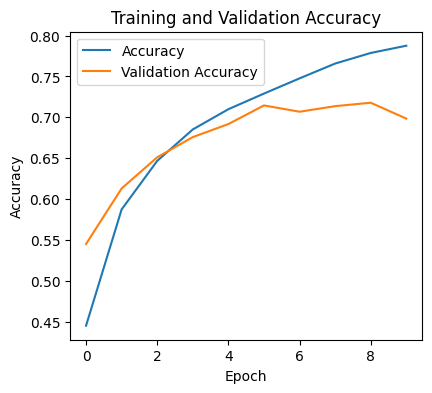

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

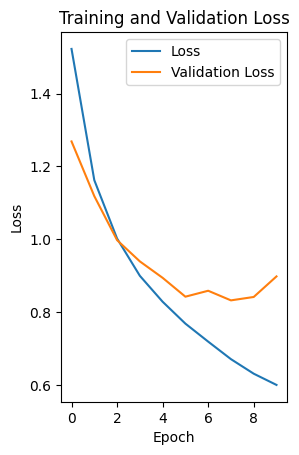

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()